* Ανδρέας Βεζάκης ΑΜ: 03117186
* Σταύρος Κινικλής ΑΜ: 03117608

# 1.ΘΕΩΡΗΤΙΚΟ ΜΕΡΟΣ

* Στην παρούσα άσκηση θα αναλύσουμε την λειτουργία της πυραμίδας Gauss στον αλγόριθμο Lucas Kanade Feature Tracker. Ο συγκεκριμένος αλγόριθμος χρησιμοποιείται για την εύρεση του optical flow μεταξύ δύο εικόνων (frames) ενός βίντεο. Αναλυτικότερα, γίνεται εφαρμογή του αλγορίθμου στις πυραμίδες Gauss (με επαναληπτικό τρόπο ξεκινώντας από το κορυφαίο επίπεδο της πυραμίδας) των δύο διαδοχικών εικόνων που συγκρίνουμε προκειμένου να καταστεί εφικτή η εύρεση του αφινικού πίνακα (matrix A) και του πίνακα των ταχυτήτων (vector d), και η εφαρμογή αυτών στην δεύτερη εικόνα ελαχιστοποιεί την διαφορά των δύο εικόνων εντός ορισμένου παραθύρου. <br>
* Τέλος, ο αλγόριθμος Lucas Kanade Feature Tracker χρησιμοποιεί μικρό παράθυρο ενδιαφέροντος το οποίο οδηγεί στην εξομάλυνση και απώλεια λεπτομερειών, ειδικά σε τμήματα που κινούνενται με διαφορετικές ταχύτητες. Επομένως, ο αλγόριθμος έχει μεγάλη ακρίβεια. Επίσης, παραμένει ανεπηρέαστος από μεταβολές στην φωτεινότητα και στην κίνηση της εικόνας.



# 2. Υλοποίηση αλγορίθμου:
## 1)

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
from google.colab import drive
from matplotlib import pyplot as plt
from skimage.feature import corner_harris, corner_subpix, corner_peaks,corner_shi_tomasi
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read()
image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

Στα επόμενα ερωτήματα, κάθε φορα που διαβάζουμε ένα καινούριο frame, καλούμε την παρακάτω εντολή για να "ρίξουμε" την ανάλυση του κατά το ήμισυ.

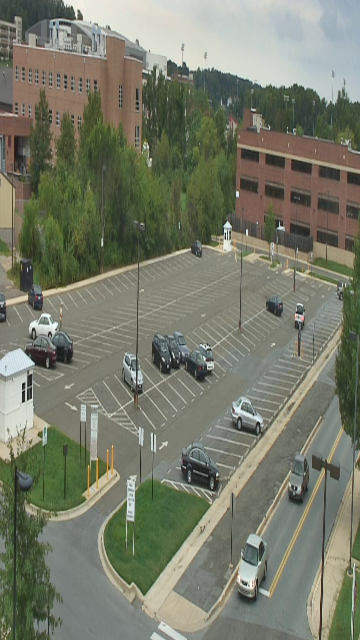

(640, 360)


In [ ]:
image = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

## 2)

* Εφαρμογή του ανιχνευτή γωνιών Harris. Παρακάτω εφαρμόζεται ο αλγόριθμος 2 φορές με διαφορικές τιμές παραμέτρων.

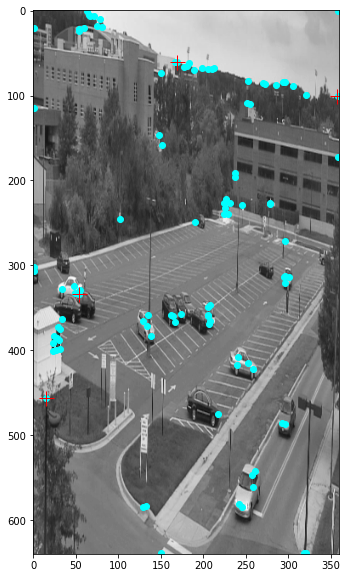

In [ ]:
coords = corner_peaks(corner_harris(image), min_distance=1)#corner_peaks(image, min_distance=1, threshold_abs=None, threshold_rel=None, 
                                                                #exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, *, num_peaks_per_label=inf)
coords_subpix = corner_subpix(image, coords, window_size=13)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, cmap=plt.cm.gray)
# Harris Corner
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

(24, 2)


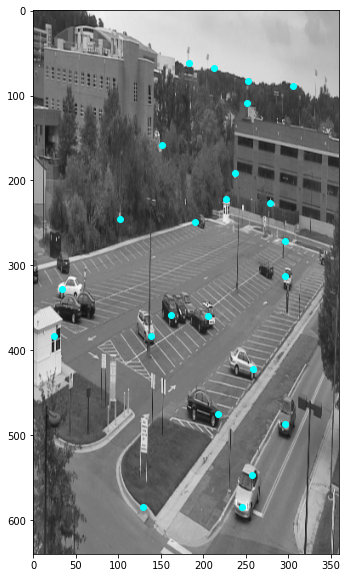

In [ ]:
coords = corner_peaks(corner_harris(image), min_distance=20)
coords_subpix = corner_subpix(image, coords, window_size=13)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, cmap=plt.cm.gray)
print(coords.shape)
# Harris Corner
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

* Εφαρμογή του ανιχνευτή γωνιών Shi tomasi. Ομοίως, παρακάτω εφαρμόζεται ο αλγόριθμος 2 φορές με διαφορικές τιμές παραμέτρων.

(30, 2)


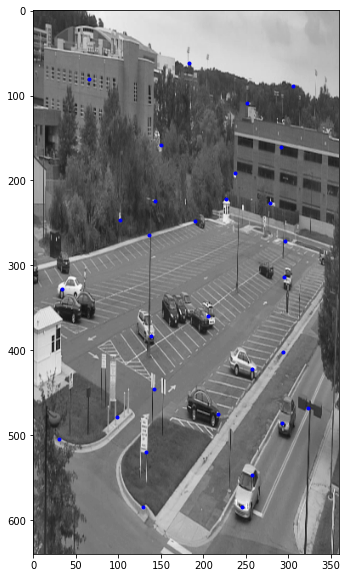

In [ ]:
coordshi = corner_peaks(corner_shi_tomasi(image), min_distance=30,num_peaks=100)#corner_peaks(image, min_distance=1, threshold_abs=None, threshold_rel=None, 
                                                                #exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, *, num_peaks_per_label=inf)
coords_subpixshi = corner_subpix(image, coordshi, window_size=13)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, cmap=plt.cm.gray)
print(coordshi.shape)
# Shi tomasi corner
ax.plot(coordshi[:, 1], coordshi[:, 0], color='blue', marker='o', linestyle='None', markersize=3)
ax.plot(coords_subpixshi[:, 1], coords_subpixshi[:, 0], '+b', markersize=5)
plt.show()

(130, 2)


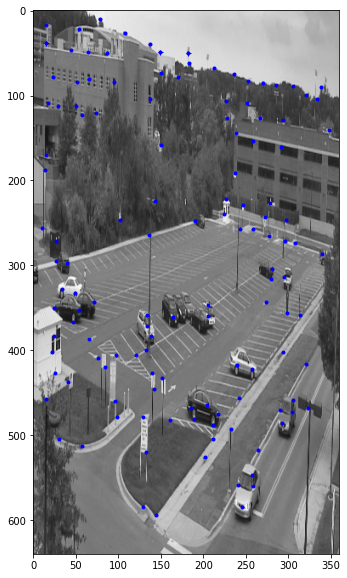

In [ ]:
coordshi = corner_peaks(corner_shi_tomasi(image), min_distance=10,num_peaks=200)#corner_peaks(image, min_distance=1, threshold_abs=None, threshold_rel=None, 
                                                                #exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, *, num_peaks_per_label=inf)
coords_subpixshi = corner_subpix(image, coordshi, window_size=13)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, cmap=plt.cm.gray)
print(coordshi.shape)
# Shi tomasi corner
ax.plot(coordshi[:, 1], coordshi[:, 0], color='blue', marker='o', linestyle='None', markersize=3)
ax.plot(coords_subpixshi[:, 1], coords_subpixshi[:, 0], '+b', markersize=5)
plt.show()

# 2ος τροπος
Με κόκκινα είναι οι γωνίες που ανιχνεύθηκαν με τον ανιχνευτή Harris, και με μπλε με τον Shi-Tomasi. Μετά από αρκετές δοκιμές με  διαφορετικές τιμές, επιλάξαμε τις παρακάτω παραμέτρους, οι οποίες μας δίνουν ένα αρκέτα ικανοποιητικό αποτέλεσμα.

Χρησιμοποιώντας την παράμετρο useHarrisDetector = True, τότε η συνάρτηση ανιχνεύει τις γωνίες με τη μέθοδο Harris. <br>
Όσο ορίσουμε το maxCorners, τόσες θα είναι και οι γωνίες που υπολογίζονται, και το minDistance, ορίζει την  μικρότερη απόσταση μεταξύ των γωνιών. Επομένως, άμα επιλέξουμε μία μικρή τιμή για το minDistance τότε θα έχουμε πολλές γωνίες σχεδόν η μία πάνω στην άλλη, και δεν θα υπολογιστούν άλλες πιο σημαντικές. Γι' αυτό ορίζουμε τιμή 7-10 στο minDistance για να είμαστε κάπου στην μέση. Το qualityLevel απορρίπτει όλες τις γωνίες που βρίσκονται κάτω από αυτό. Δοκιμάζοντας διάφορες τιμές, βλέπουμε ότι η τιμή 0.1 μας δίνει ένα καλό αποτέλεσμα.

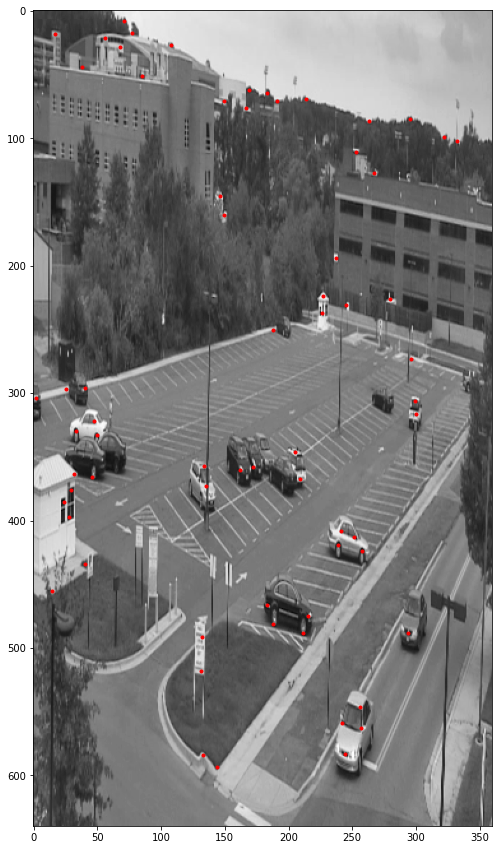

In [ ]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

p0 = cv2.goodFeaturesToTrack(image, mask = None, **feature_params, useHarrisDetector = True)

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(p0[:,0, 0], p0[:,0, 1], color='red', marker='o', linestyle='None', markersize=3)

plt.show()

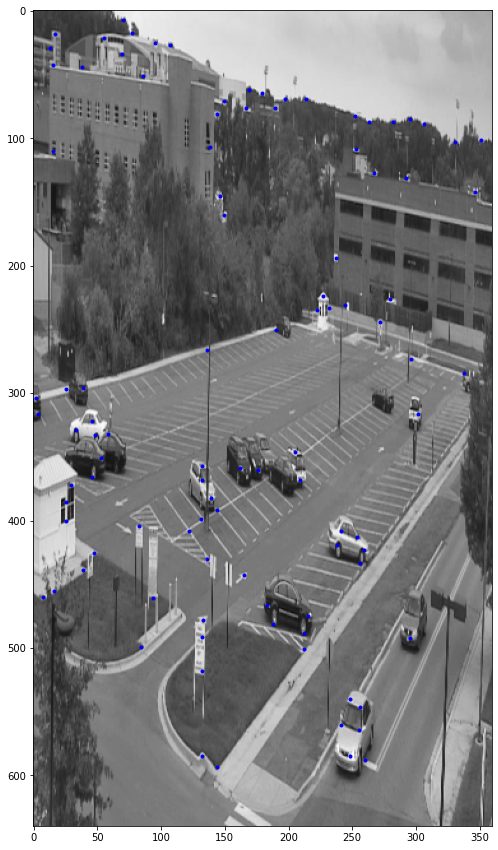

In [ ]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

p0 = cv2.goodFeaturesToTrack(image, mask = None, **feature_params)

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(p0[:,0, 0], p0[:,0, 1], color='blue', marker='o', linestyle='None', markersize=3)

plt.show()

## 3)
* Για τα Harris σημεία. <br> Για να υπολογίσουμε τα σημεία Harris χρησιμοποιούμε τον ίδιο τρόπο με παραπάνω.<br>
Να σημειωθεί ότι σε αυτό το ερώτημα και τα υπόλοιπα παρακάτω, δεν τρέχουμε τον αλγόριθμο για όλο το βιντέο, επειδή στην περίπτωση που το τρέχαμε για όλη τη διάρκεια του βίντεο το google colab έκανε disconect, και αφού η αποτελεσματικότητα του αλγορίθμου μπορεί να φανεί και μόνο με ένα μίκρο μέρος του βίντεο.

In [ ]:
#Read the video again, to start from the beggining
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read() 
frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray, mask = None, **feature_params, useHarrisDetector = True)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame)

for i in range(30): #Run 10 times, for reasons of simplicity , and it also crashes
    ret,frame = cap.read()
    frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

* Ομοίως για τα σημεία Shi-Tomasi

In [ ]:
#Read the video again, to start from the beggining
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read() 
frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame)

for i in range(20): #Run 10 times, for reasons of simplicity, and it also crashes
    ret,frame = cap.read()
    frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

# 4
* Σε αυτό το ερώτημα τυπώνουμε τις γωνίες που βρίσκουμε ανά 10 frame (τυχαίος αριθμός) του βίντεο, έτσι ώστε να παρουσιάζονται τα σημεία ανά ένα συγκεκριμένο χρονικκό διάστημα, και όχι σε κάθε frame.
* Στο σημείο που προσθέταμε τις γωνίες για να τυπωθούν στην έξοδο, προσθέσαμε μία συνθήκη η οποία ελέγχει άμα οι γωνίες έχουν μετακινηθεί πάνω από ένα πιξελ.

* Παρατηρούμε ότι κρατώντας τις γωνίες ανά συγκεκριμένο αριθμό frame, μας εμφανίζει σωστά αυτές του ενός αυτοκινήτου που κινείται, και "κρύβει" τα υπόλοιπα που βρίσκονται στο ίδιο σημείο. Όμως, η κίνηση του 2ου αυτοκινήτου είναι πολύ μικρή και δεν την ανιχνεύει. <br>
* Στο πρώτο frame, δεν έχει γίνει καμία κίνηση και επομένως έχουμε την αρχική εικόνα.<br>
* Όσο αυξάνουμε το χρονικό διάστημα στο οποίο ενημερώνονται τα σημεία, τόσο λίγοτερο ακριβής παρουσιάζεται η κίνηση του αυτοκινήτου.

In [ ]:
#Read the video again, to start from the beggining
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read() 
frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame)

for sela in range(1000): #Run 10 times, for reasons of simplicity, and it also crashes
    ret,frame = cap.read()
    frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        if abs(int(a) -  int(c)) > 1 or abs(int(b) -  int(d)) > 1:
          mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
          frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    if sela%10==0:
      img = cv2.add(frame,mask)
      cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

# 5
Για να προσθέσουμε θόρυβο στις εικόνες θα χρησιμοποιήσουμε την συνάρτηση της skimage.utils την random_noise με παράμετρο <br> mode='s&p'.

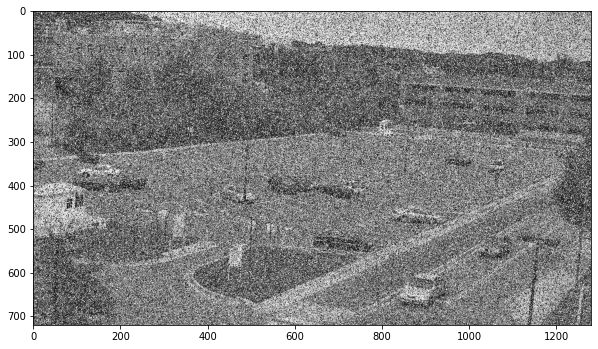

In [ ]:
noise = random_noise(image, mode='s&p',amount=0.4)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(noise, cmap="gray")
plt.show()

* Όπως ήταν αναμενόμενο, η προσθήκη θορύβου στην εικόνα κάνει τον εντοπισμό των γωνιών πιο δύσκολο και με μικρότερη ακρίβεια (αφού ουσιαστικά έχει παραμορφωθεί η εικόνα). Επομένως, φαίνεται ότι οι γωνίες κάθε φορά υπολογίζονται σε διαφορετικό σημείο (κακή ακρίβεια), με αποτέλεσμα να παρουσιάζονται πολλές χαοτικές κινήσεις των πίξελ και να μην φαίνεται η κίνηση των αυτοκινήτων.
* Στην δεύτερη εκτέλεση του ίδιου αλγορίθμου προσθέτουμε λιγότερο θόρυβο στις εικόνες, και παρατηρούμε ότι είναι αντιληπτή η κίνηση των αυτοκινήτων, όμως ταυτόχρονα παρουσιάζονται και κινήσεις σημείων που είναι ακίνητα στην πραγματικότητα, το οποίο είναι αναμενόμενο για τον ίδιο λόγο με παραπάνω.

In [ ]:
#Read the video again, to start from the beggining
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read() 
frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame)

for sela in range(1000): #Run 20 times, for reasons of simplicity (Colab also keeps crashing)
    ret,frame = cap.read()
    frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
    noise_img = random_noise(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), mode='s&p',amount=0.4) # add salt and pepper noise to the gray image
    frame_gray = cv2.normalize(noise_img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) # normalize pixel values to 0-255 
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        if abs(int(a) -  int(c)) > 1 or abs(int(b) -  int(d)) > 1:
          mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
          frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    if sela%10==0:
      img = cv2.add(frame,mask)
      cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

In [ ]:
#Read the video again, to start from the beggining
cap = cv2.VideoCapture("/content/drive/MyDrive/VIRAT_S_000206_09_001714_001851.mp4")
ret, frame = cap.read() 
frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame)

for sela in range(1000): #Run 20 times, for reasons of simplicity (Colab also keeps crashing)
    ret,frame = cap.read()
    frame = cv2.resize(frame,(frame.shape[0]//2, frame.shape[1]//2))
    noise_img = random_noise(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), mode='s&p',amount=0.1) # add salt and pepper noise to the gray image
    frame_gray = cv2.normalize(noise_img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) # normalize pixel values to 0-255 
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        if abs(int(a) -  int(c)) > 1 or abs(int(b) -  int(d)) > 1:
          mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
          frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    if sela%10==0:
      img = cv2.add(frame,mask)
      cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)